In [3]:
#import section
import requests
from bs4 import BeautifulSoup
import pandas as pd
import math
from collections import Counter
import csv

In [4]:
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 20_0_1; en-US; X11; Linux x86_64) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/18.0.0 Safari/1500'}

In [5]:
data_list = []

In [7]:
#link to pages 
for pages in range(1,71):
  r = requests.get('https://www.lotto-8.com/listltobigbbk.asp?indexpage='+str(pages)+'&orderby=new', headers = headers)
  r.encoding = 'UTF-8' 
  soup = BeautifulSoup(r.text,'html.parser')
  lo_numbers = soup.select('[style*="border-bottom-style: dotted; border-bottom-color: #CCCCCC; font-size:36px"]')

  for td in lo_numbers:
    numbers = td.text
    data_list.append(numbers)

df = pd.DataFrame(data_list, columns=['Numbers'])



In [ ]:
all_numbers = []

for numbers in df['Numbers']:
    for number in numbers.split(','):
        all_numbers.append(number.strip())

print(all_numbers)

In [9]:
print(len(all_numbers))
print(type(all_numbers[0]))


29400
<class 'str'>


In [ ]:
for i in range(len(all_numbers)):
  all_numbers[i] = int(all_numbers[i])

print(type(all_numbers[0]))
print(all_numbers)
print(len(all_numbers))

In [ ]:
#calculate the percentage
for i in range(1,50):
  print(i, ':',all_numbers.count(i) , ',', round(all_numbers.count(i)/len(all_numbers)*100,2), '%')
  

In [12]:
fields = ['lottery_number','count','percentage']
rows = []

for i in range(1,50):
  count = all_numbers.count(i)
  total = len(all_numbers)
  percentage = round(count/total*100,2)
  rows.append([i, count, percentage])
  


<function matplotlib.pyplot.show(close=None, block=None)>

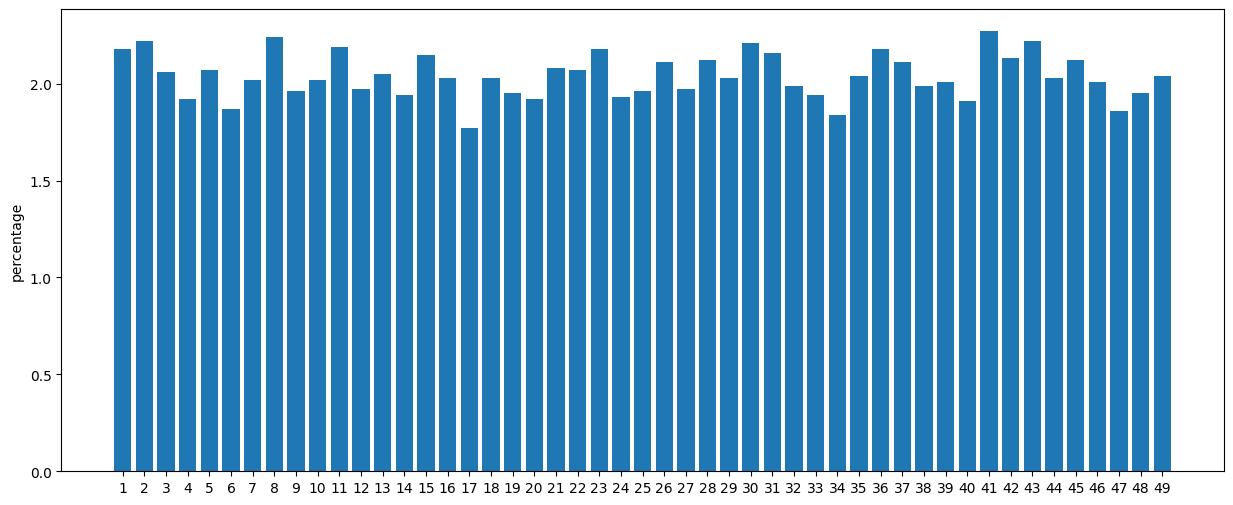

In [13]:
#visualization
import matplotlib.pyplot as plt

numbers = [row[0] for row in rows]
percentages = [row[2] for row in rows]

plt.figure(figsize=(15, 6))


bars = plt.bar(numbers, percentages)

plt.xticks(numbers)
plt.ylabel(fields[2])

plt.show



In [14]:
#find top 7 numbers
df = pd.DataFrame(rows, columns=fields)

df_sorted = df.sort_values(by='percentage', ascending=False)
top_7 = df_sorted.head(7)

print(top_7)

    lottery_number  count  percentage
40              41    668        2.27
7                8    660        2.24
1                2    654        2.22
42              43    652        2.22
29              30    650        2.21
10              11    644        2.19
0                1    640        2.18


<function matplotlib.pyplot.show(close=None, block=None)>

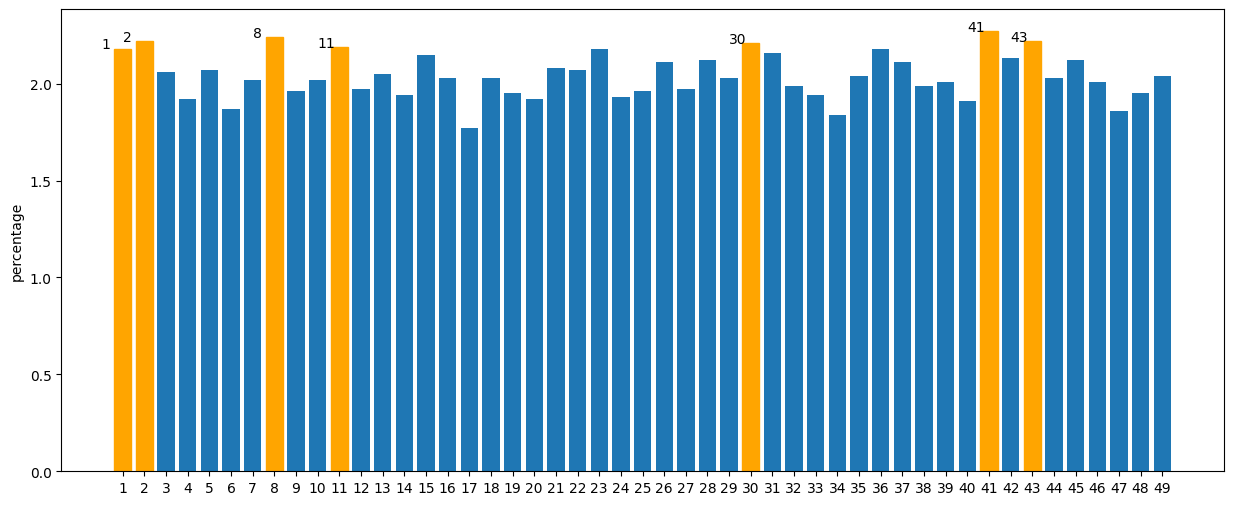

In [15]:
#visualization
plt.figure(figsize=(15, 6))


bars = plt.bar(numbers, percentages)

plt.xticks(numbers)
plt.ylabel(fields[2])

for index in top_7.index:
    bars[index].set_color('orange')
    plt.text(index, percentages[index], str(numbers[index]))

plt.show

In [16]:
#find bottom 7 numbers
df = pd.DataFrame(rows, columns=fields)

df_sorted = df.sort_values(by='percentage', ascending=True)
bottom_7 = df_sorted.head(7)

print(bottom_7)

    lottery_number  count  percentage
16              17    520        1.77
33              34    540        1.84
46              47    548        1.86
5                6    550        1.87
39              40    562        1.91
3                4    564        1.92
19              20    564        1.92


<function matplotlib.pyplot.show(close=None, block=None)>

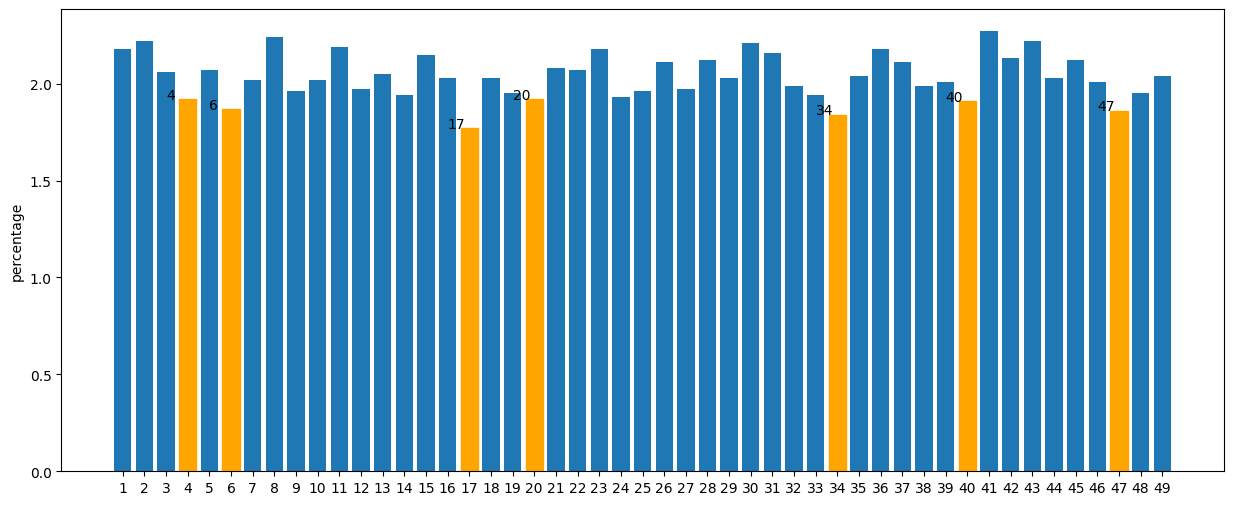

In [17]:
#visualization
plt.figure(figsize=(15, 6))


bars = plt.bar(numbers, percentages)

plt.xticks(numbers)
plt.ylabel(fields[2])

for index in bottom_7.index:
    bars[index].set_color('orange')
    plt.text(index, percentages[index], str(numbers[index]))

plt.show